def scale_images(data)ée

In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets
!pip install ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [ ]:

#bringing in tensorflow
import tensorflow as tf


In [ ]:
# UPLOADING DATASETS FROM FASHION MNSIT
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

UPLOADING DATASETS TO NOTEBOOK


In [ ]:
ds = tfds.load('fashion_mnist',split = 'train')


In [ ]:
ds.as_numpy_iterator().next()['label']

2

VISUALIZE IMAGES AND BUILD DATA PIPELINE


In [ ]:
#for datatransformation
import numpy as np


In [ ]:
#build iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
#getting data out of the pipeline

dataiterator.next()


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [ ]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

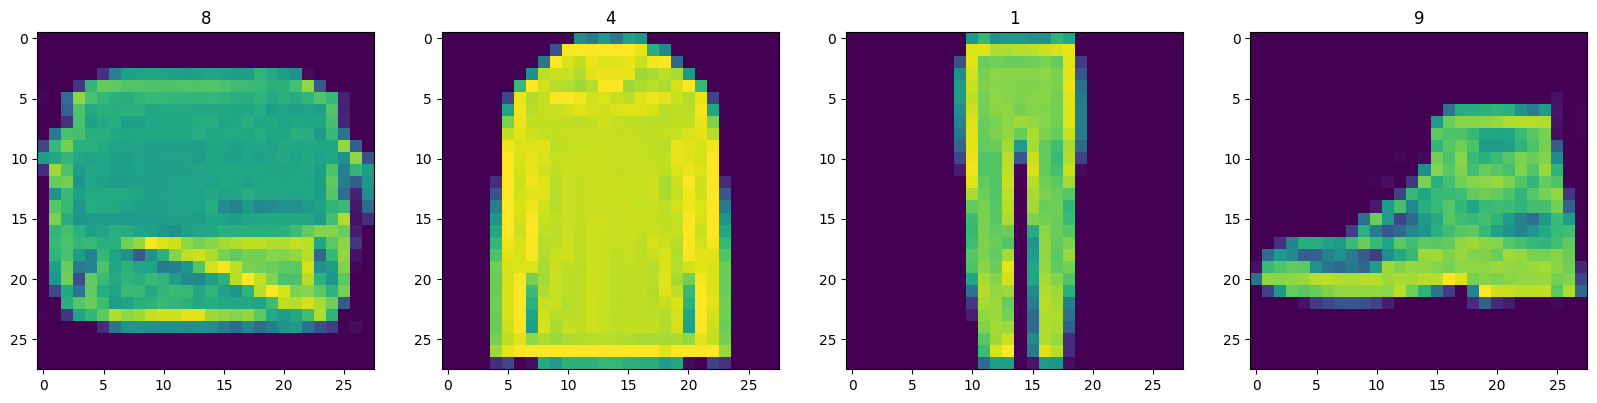

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize = (20,20))
#loop 4 times to get the images in 1 batch
for idx in range(4):
    batch = dataiterator.next()
    #imageshow function = imshow
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

 # DATA PROCESSING


In [ ]:
#scalling images from value range between 0- 2555 to 0 -1
def scale_images(data):
  image = data['image']
  return image/255

steps that we use wen we build a tensorflow pipeline :
map
cache
shuffle
batch
prefetch

In [ ]:
#reload the dataset
ds = tfds.load('fashion_mnist',split = 'train')
#running the ds through the scale_images preprocessing step (we are overriding the variable ds)
ds = ds.map(scale_images)
#cache the dataset for theat batch
ds = ds.cache()
#shuffle as to ensure that we are shuffling the datasets
ds = ds.shuffle(60000) #to specify the shuffle buffiness be
#batch into 128 images?
ds = ds.batch(128)
#slows down the likelihood of bottlenecking
ds = ds.prefetch(64) #prefetch passing through 64

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

#BUILD NEURAL NETWORK

 1. IMPORT MODELLING COMPONENTS
 2. BUILD GENERATOR
 3. BUILD DISCRIMINATOR

In [ ]:
#1. # BRING IN SOME MORE DEPENDENCIES
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential

# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### BUILDING GENERATOR


In [ ]:
#CREATING A FUNCTION
def build_generator():
  model = Sequential()

  #what our input layer is going to be --> a dense fully connected layer | 7*7*128 - no of units-pass 128 random values to generator to help it determine what to generate from there -generator generate random values data 128 will be convertd into a spacial area - array of 128 values so we will convert it into a space of 7 by 7 dimension )
  model.add(Dense(7*7*128,input_dim= 128))

  #applying an activation while we are appplying a leaky ReLU-cater for non linearities in our model
  model.add(LeakyReLU(0.2))

  # 7,7,128- set of arrays so dont forget to wrap it in a bracket
  model.add(Reshape((7,7,128)))

  #USING CONV2D AND UP SAMPLING LAYERS TO GET US TO 28,28,1 INSTEAD OF 7,7,128

#  ^| did reshaping from the input dimensions of a 128

  #UPSAMPLING BLOCK 1 -double the spacial quality-->went to 14,14,128
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  #UPSAMPLING BLOCK 2 --> took it to 28,28,128
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

   #DOWNSAMPLING BLOCK 1-->(convolutional block -->)maintainging spacial shape as padding = same
  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

   #DOWNSAMPLING BLOCK 2 -->(convolutional block -->)
  model.add(Conv2D(128,4, padding= 'same' ))
  model.add(LeakyReLU(0.2))

  #conv layer to get to one channel
  model.add(Conv2D(1,4,padding = 'same', activation= 'sigmoid')) # 1 kernel of 4 by 4 dim

  return model

In [ ]:
generator = build_generator()#define test model

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

Passing random values to generator to test


In [ ]:
img = generator.predict(np.random.randn(4,128,1))


1/1 [==============================] - 1s 562ms/step


In [ ]:

img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 248ms/step


(4, 28, 28, 1)

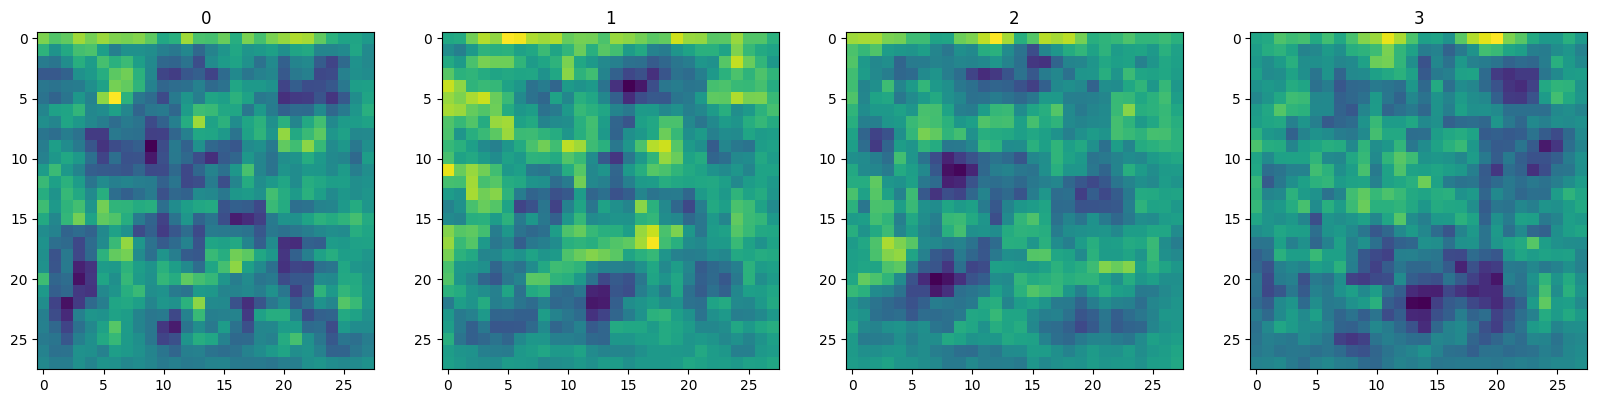

In [ ]:


#set up the subplot format
fig, ax = plt.subplots(ncols=4,figsize = (20,20))
#loop 4 times to get the images in 1 batch
for idx, img in enumerate(img):
    #imageshow function = imshow
    #plot the images using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    #appending the image label as the plot title
    ax[idx].title.set_text(idx)

###BUILD DISCRIMINATOR

In [ ]:
img.shape

(28, 28, 1)

In [ ]:

#JUST A IMAGE CLASSIFIER - WE JUST ADD LAYER TO INCREASE THE REGULARIZATION
def build_discriminator():
  model = Sequential()

#1ST Conv2D block
  model.add(Conv2D(32, 5,input_shape = (28,28,1)))# (height, width, channels) #32 filters and have the shape of 5 by 5 |we are not condensing padding = same so it will start condensing down the information it is getting | input of D will be same as the Output of G

  #adding activation layer
  model.add(LeakyReLU(0.2))
  #applying the dropout as we want to make it hard for D to learn | so dropout effectively and add regularizations to the model
  model.add(Dropout(0.4)) #set positional args as 0.4 i.e the strength of the dropout

#2nd Conv block
  model.add(Conv2D(64, 5))#we remove the input shape attribute  need to specify the input shape as it is not the 1st input layer
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


#3rd Conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

#4th Conv block
  model.add(Conv2D(256, 5))#256, represents the number of output channels in the layer | 5, corresponds to the kernel size, indicating a 5x5 receptive field.
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten then pass to dense layer
  model.add(Flatten())
  #it is a good practise to add Dropout after flatten
  model.add(Dropout(0.4)) ## check if by removing this layer we are getting good performance
  model.add(Dense(1,activation ="sigmoid") )#1- false img |0- true image
  # 1, denotes the number of neurons in the layer, which corresponds to a single output unit.
  # The activation='sigmoid' parameter specifies that the sigmoid activation function is applied to the output of this layer.###



  return model


In [ ]:
#setup a instance of a disciminator
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
#discriminator.predict(img)
discriminator.predict(np.expand_dims(img,0))


1/1 [==============================] - 0s 189ms/step


array([[0.5030638]], dtype=float32)

#TRAINING LOOP


  - Write the code to train the generator and discriminator simultaneously.
  - we need more than .fit method for it to work so we define our own custom training set

  - by using the trainng loop we are just trying to change the .fit function by defining our own training set





SETUP LOSSES AND OPTIMIZERS

In [ ]:
#use binary cross entropy and use adam optimizers
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
#BinaryCrossEntropy will be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
#create instances of the optimizers
g_opt = Adam (learning_rate = 0.0001) #learning rate of the generator will be fater than that of the discriminator as we dont want the discriminator to go too fast and smash our generator
d_opt = Adam(learning_rate = 0.00001)

#create instances of the optimizers and losses
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


BUILD SUBCLASSED MODEL

In [ ]:
#IMPORTING THE BASE MODEL CLASS TO SUBCLASS
from tensorflow.keras.models import Model

In [ ]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))),tf.ones_like(tf.random.normal((6,128)))], axis =0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [ ]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data and load images
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [ ]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)


Build Callback


In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):#save examples that we want to save
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('GANsimages', f'generated_img_{epoch}_{i}.png'))


Train

In [ ]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=200, callbacks=[ModelMonitor()])

Epoch 1/200
115/469 [======>.......................] - ETA: 3:03:53 - d_loss: 0.6735 - g_loss: 0.8348

Review Performance

In [ ]:
plt.subtitle('loss')
plt.plot(hist.history['d_loss'],label ='d_loss' )
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

Testing the Generator

generate images

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))


In [ ]:
fig,ax = plt.subplots(ncols =4,nrows = 4, figsize = (20,20))
for r in range(4):
  for c in range (4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

Save the model

In [ ]:
generator.save("generator.h5")
discriminator.save("discriminator.h5")